# Imports


In [1]:
! pip install gdown
!gdown 13W3xPoFiK4zgPEq0PYByT4qYsZK1v1KK

Downloading...
From: https://drive.google.com/uc?id=13W3xPoFiK4zgPEq0PYByT4qYsZK1v1KK
To: d:\desk top folders\ML\MachineLearning2024W\Projects\mini project 1\Q3\src\weatherHistory.csv

  0%|          | 0.00/16.2M [00:00<?, ?B/s]
  6%|▋         | 1.05M/16.2M [00:00<00:02, 6.88MB/s]
 13%|█▎        | 2.10M/16.2M [00:00<00:02, 6.05MB/s]
 19%|█▉        | 3.15M/16.2M [00:00<00:04, 2.66MB/s]
 39%|███▉      | 6.29M/16.2M [00:01<00:01, 6.26MB/s]
 45%|████▌     | 7.34M/16.2M [00:01<00:01, 5.88MB/s]
 52%|█████▏    | 8.39M/16.2M [00:01<00:01, 5.63MB/s]
 58%|█████▊    | 9.44M/16.2M [00:01<00:01, 5.21MB/s]
 65%|██████▍   | 10.5M/16.2M [00:02<00:01, 5.05MB/s]
 71%|███████   | 11.5M/16.2M [00:02<00:00, 5.09MB/s]
 78%|███████▊  | 12.6M/16.2M [00:02<00:00, 4.91MB/s]
 84%|████████▍ | 13.6M/16.2M [00:02<00:00, 3.82MB/s]
 87%|████████▋ | 14.2M/16.2M [00:03<00:00, 2.88MB/s]
 91%|█████████ | 14.7M/16.2M [00:03<00:00, 2.76MB/s]
 94%|█████████▍| 15.2M/16.2M [00:03<00:00, 2.49MB/s]
 97%|█████████▋| 15.7M/16.2M 

In [2]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.model_selection import train_test_split
import sklearn.datasets as datasets
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import plotly.graph_objects as go
from sklearn.datasets import make_blobs
from sklearn.linear_model import SGDClassifier

ROOT_LOCAL = "D:\desk top folders\ML\MachineLearning2024W"
%cd {ROOT_LOCAL}

D:\desk top folders\ML\MachineLearning2024W


# Q1


## Section 2 - Generate Dataset


In [3]:
def plot_3d_dataset(points, labels, title):
    # Generated by ChatGPT
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    n = labels.max()+1
    colors = cm.rainbow(np.linspace(0, 1, n))
    for i in range(n):
        ax.scatter(points[labels == i, 0], points[labels == i, 1],
                   points[labels == i, 2], c=[colors[i]], label=f'Class {i}')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(title)
    ax.legend()
    plt.show()

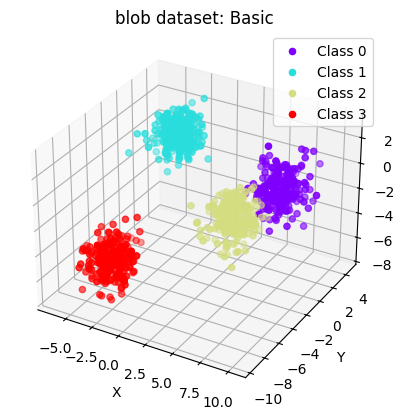

In [4]:
X_blob_basic, Y_blob_basic = datasets.make_blobs(
    [250, 250, 250, 250], n_features=3, random_state=53)
plot_3d_dataset(X_blob_basic, Y_blob_basic, "blob dataset: Basic")

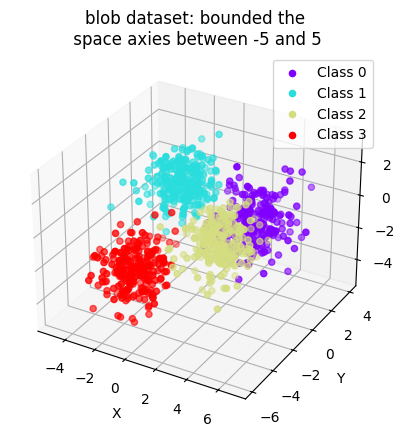

In [5]:
X_blob_bounded_box, Y_blob_bounded_box = datasets.make_blobs(
    [250, 250, 250, 250], center_box=[-5, 5], n_features=3, random_state=53)
plot_3d_dataset(X_blob_bounded_box, Y_blob_bounded_box,
                "blob dataset: bounded the\n space axies between -5 and 5")

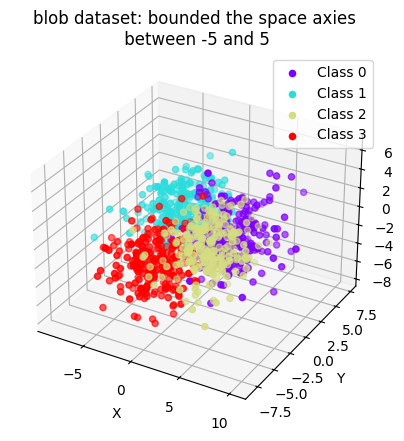

In [6]:
X_blob_bounded_box_std, Y_blob_bounded_box_std = datasets.make_blobs(
    [250, 250, 250, 250], center_box=[-5, 5], cluster_std=2, n_features=3, random_state=53, )
plot_3d_dataset(X_blob_bounded_box_std, Y_blob_bounded_box_std,
                "blob dataset: bounded the space axies\n between -5 and 5")

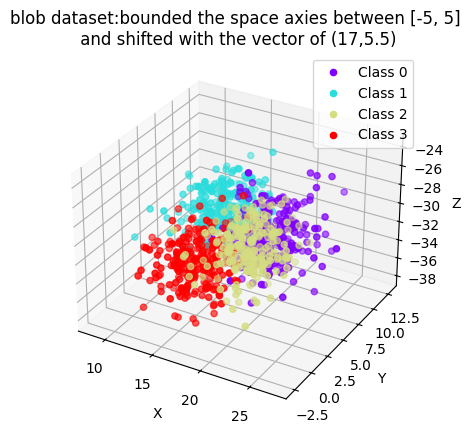

In [7]:
X_blob_bounded_box_std_shift = X_blob_bounded_box_std + \
    np.array([17, 5.5, -30.33])
plot_3d_dataset(X_blob_bounded_box_std_shift, Y_blob_bounded_box_std,
                "blob dataset:bounded the space axies between [-5, 5]\n and shifted with the vector of (17,5.5)")

## Section 3 - Train Linear Model


In [8]:
X = X_blob_bounded_box_std_shift
Y = Y_blob_bounded_box_std

X_train_raw, X_test_raw, Y_train, Y_test = train_test_split(
    X, Y, train_size=0.8, random_state=53)

In [9]:
scaler = preprocessing.StandardScaler().fit(X_train_raw)
X_train = scaler.transform(X_train_raw)
X_test = scaler.transform(X_test_raw)
s = preprocessing.StandardScaler().fit(X_train)
print(f"train mean is equal to {s.mean_} and variance is equal to {s.var_}")
s = preprocessing.StandardScaler().fit(X_test)
print(f"test mean is equal to {s.mean_} and variance is equal to {s.var_}")
print("shape of X_train, Y_train, X_test, Y_test is equal to:",
      X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

train mean is equal to [ 4.50139925e-15 -1.47576396e-15  1.61155811e-14] and variance is equal to [1. 1. 1.]
test mean is equal to [-0.00094694  0.00305504  0.03303201] and variance is equal to [0.79717539 0.91995877 1.10986582]
shape of X_train, Y_train, X_test, Y_test is equal to: (800, 3) (800,) (200, 3) (200,)


### Logistic Regression


In [10]:
"""
Train Logistic Regression models with different solvers and configurations.

This block trains two sets of Logistic Regression models using different solvers and multi-class strategies:
- First set: Uses solvers 'sag', 'saga', 'lbfgs', 'newton-cg' with 'multinomial' multi-class strategy.
- Second set: Expands the solver list to include 'liblinear', 'newton-cholesky' and uses 'ovr' (one-vs-rest) strategy.

Parameters:
- X_train_raw, Y_train: Training dataset features and labels before normalization.
- X_test_raw, Y_test: Test dataset features and labels before normalization.
"""

print("These results are for training the LogisticRegression model before apply the normalization transform on the training and test set.")
# Training Logistic Regression models with 'multinomial' multi-class setting
LR0_Q1 = {}
for solver in ['sag', 'saga', 'lbfgs', 'newton-cg']:
	 # Training each model using the specified solver
    LR0_Q1[solver] = LogisticRegression(penalty="l2",
                                        dual=False,
                                        C=1.0,
                                        solver=solver,
                                        max_iter=1500,
                                        multi_class="multinomial",
                                        random_state=53).fit(X_train_raw, Y_train)

# Display the training and test scores for the model
for model in LR0_Q1.keys():
    print(f"model with {model} solver and multi_class=multinomial score on train set is equal ot {LR0_Q1[model].score(X_train_raw,Y_train)}")

    print(f"model with {model} solver and multi_class=multinomial score on test set is equal ot {LR0_Q1[model].score(X_test_raw,Y_test)}\n")

print("\n", "------------------------------------------------------------", "\n")

# Training Logistic Regression models with 'ovr' multi-class setting
LR0_Q1 = {}
for solver in ['sag', 'saga', 'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky']:
    # Training each model using the specified solver for 'ovr' strategy
    LR0_Q1[solver] = LogisticRegression(penalty="l2",
                                        dual=False,
                                        C=1.0,
                                        solver=solver,
                                        max_iter=1500,
                                        multi_class='ovr',
                                        random_state=53).fit(X_train_raw, Y_train)

# Display the training and test scores for the model
for model in LR0_Q1.keys():
    print(f"model with {model} solver and multi_class=ovr score on train set is equal ot {LR0_Q1[model].score(X_train_raw,Y_train)}")
    print(f"model with {model} solver and multi_class=ovr score on test set is equal ot {LR0_Q1[model].score(X_test_raw,Y_test)}\n")

c:\Users\mamdaliof\anaconda3\envs\ML\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\mamdaliof\anaconda3\envs\ML\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


These results are for training the LogisticRegression model before apply the normalization transform on the training and test set.
model with sag solver and multi_class=multinomial score on train set is equal ot 0.7775
model with sag solver and multi_class=multinomial score on test set is equal ot 0.735

model with saga solver and multi_class=multinomial score on train set is equal ot 0.77125
model with saga solver and multi_class=multinomial score on test set is equal ot 0.72

model with lbfgs solver and multi_class=multinomial score on train set is equal ot 0.79375
model with lbfgs solver and multi_class=multinomial score on test set is equal ot 0.735

model with newton-cg solver and multi_class=multinomial score on train set is equal ot 0.79375
model with newton-cg solver and multi_class=multinomial score on test set is equal ot 0.735


 ------------------------------------------------------------ 



c:\Users\mamdaliof\anaconda3\envs\ML\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\mamdaliof\anaconda3\envs\ML\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\mamdaliof\anaconda3\envs\ML\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\mamdaliof\anaconda3\envs\ML\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


model with sag solver and multi_class=ovr score on train set is equal ot 0.78625
model with sag solver and multi_class=ovr score on test set is equal ot 0.745

model with saga solver and multi_class=ovr score on train set is equal ot 0.78125
model with saga solver and multi_class=ovr score on test set is equal ot 0.73

model with lbfgs solver and multi_class=ovr score on train set is equal ot 0.7825
model with lbfgs solver and multi_class=ovr score on test set is equal ot 0.75

model with liblinear solver and multi_class=ovr score on train set is equal ot 0.76125
model with liblinear solver and multi_class=ovr score on test set is equal ot 0.725

model with newton-cg solver and multi_class=ovr score on train set is equal ot 0.7825
model with newton-cg solver and multi_class=ovr score on test set is equal ot 0.75

model with newton-cholesky solver and multi_class=ovr score on train set is equal ot 0.7825
model with newton-cholesky solver and multi_class=ovr score on test set is equal ot

In [11]:
"""
this block of code is for training LogisticRegression model with different solvers and different multi_class arguments

Parameters:
- X_train: Training dataset features after normalization
- X_test Test dataset features after normalization
"""

print("These results are obtained from training LogisticRegression model with different solvers and different multi_class arguments\n")
# Training Logistic Regression models with 'multinomial' multi-class setting
LR1_Q1 = {}
for solver in ['sag', 'saga', 'lbfgs', 'newton-cg']:
	# Training each model using the specified solver
    LR1_Q1[solver] = LogisticRegression(penalty="l2",
                                        dual=False,
                                        C=1.0,
                                        solver=solver,
                                        max_iter=1500,
                                        multi_class="multinomial",
                                        random_state=53).fit(X_train, Y_train)
# Display the training and test scores for the model
for model in LR1_Q1.keys():
    print(f"model with {model} solver and multi_class=multinomial score on train set is equal to {LR1_Q1[model].score(X_train,Y_train)}")
    print(f"model with {model} solver and multi_class=multinomial score on test set is equal to {LR1_Q1[model].score(X_test,Y_test)}\n")

print("------------------------------------------------------------", "\n")

# Training Logistic Regression models with 'ovr' multi-class setting
LR2_Q1 = {}
for solver in ['sag', 'saga', 'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky']:
	# Training each model using the specified solver
    LR2_Q1[solver] = LogisticRegression(penalty="l2",
                                        dual=False,
                                        C=1.0,
                                        solver=solver,
                                        max_iter=1500,
                                        multi_class='ovr',
                                        random_state=53).fit(X_train, Y_train)
# Display the training and test scores for the model
for model in LR2_Q1.keys():
    print(f"model with {model} solver and multi_class=ovr score on train set is equal to {LR2_Q1[model].score(X_train,Y_train)}")
    print(f"model with {model} solver and multi_class=ovr score on test set is equal to {LR2_Q1[model].score(X_test,Y_test)}\n")

These results are obtained from training LogisticRegression model with different solvers and different multi_class arguments

model with sag solver and multi_class=multinomial score on train set is equal to 0.79375
model with sag solver and multi_class=multinomial score on test set is equal to 0.74

model with saga solver and multi_class=multinomial score on train set is equal to 0.79375
model with saga solver and multi_class=multinomial score on test set is equal to 0.74

model with lbfgs solver and multi_class=multinomial score on train set is equal to 0.79375
model with lbfgs solver and multi_class=multinomial score on test set is equal to 0.74

model with newton-cg solver and multi_class=multinomial score on train set is equal to 0.79375
model with newton-cg solver and multi_class=multinomial score on test set is equal to 0.74

------------------------------------------------------------ 

model with sag solver and multi_class=ovr score on train set is equal to 0.78125
model with s

In [12]:
"""
There results set the best value of C between 0.01 and 1.5

Parameters:
- X_train: Training dataset features after normalization
- X_test Test dataset features after normalization
"""

print("These results indicate the beset value of C between 0.01 and 1.5\n")

# Training Logistic Regression models with 'multinomial' multi-class setting and different C values
LR3_Q1 = {}
for solver in ['sag', 'saga', 'lbfgs', 'newton-cg']:

    best_score = -1
    for i in np.arange(0.01, 1.5, 0.01):
		# Training each model using the specified solver and C value
        m = LogisticRegression(penalty="l2",
                               dual=False,
                               C=i,
                               solver=solver,
                               max_iter=1500,
                               multi_class="multinomial",
                               random_state=53).fit(X_train, Y_train)

        if m.score(X_test, Y_test) > best_score:
            best_score = m.score(X_test, Y_test)
            LR3_Q1[solver] = m
            
# Display the training and test scores for the model
for model in LR3_Q1.keys():
    print(f"model with {model} solver and multi_class=multinomial score on train set is equal to {LR3_Q1[model].score(X_train,Y_train)}. C={LR3_Q1[model].get_params()['C']}")
    print(f"model with {model} solver and multi_class=multinomial score on test set is equal to {LR3_Q1[model].score(X_test,Y_test)}\n")

print("\n")

# Training Logistic Regression models with 'ovr' multi-class setting and different C values
LR4_Q1 = {}
for solver in ['sag', 'saga', 'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky']:
	# Training each model using the specified solver and C value
    best_score = -1
    for i in np.arange(0.01, 1.5, 0.01):
        m = LogisticRegression(penalty="l2",
                               dual=False,
                               C=i,
                               solver=solver,
                               max_iter=1500,
                               multi_class="ovr",
                               random_state=53).fit(X_train, Y_train)

        if m.score(X_test, Y_test) > best_score:
            best_score = m.score(X_test, Y_test)
            LR4_Q1[solver] = m
            
# Display the training and test scores for the model
for model in LR4_Q1.keys():
    print(f"model with {model} solver and multi_class=ovr score on train set is equal to {LR4_Q1[model].score(X_train,Y_train)}. C={LR4_Q1[model].get_params()['C']}")
    print(f"model with {model} solver and multi_class=ovr score on test set is equal to {LR4_Q1[model].score(X_test,Y_test)}\n")

These results indicate the beset value of C between 0.01 and 1.5

model with sag solver and multi_class=multinomial score on train set is equal to 0.78625. C=0.02
model with sag solver and multi_class=multinomial score on test set is equal to 0.74

model with saga solver and multi_class=multinomial score on train set is equal to 0.78625. C=0.02
model with saga solver and multi_class=multinomial score on test set is equal to 0.74

model with lbfgs solver and multi_class=multinomial score on train set is equal to 0.78625. C=0.02
model with lbfgs solver and multi_class=multinomial score on test set is equal to 0.74

model with newton-cg solver and multi_class=multinomial score on train set is equal to 0.78625. C=0.02
model with newton-cg solver and multi_class=multinomial score on test set is equal to 0.74



model with sag solver and multi_class=ovr score on train set is equal to 0.78. C=0.19
model with sag solver and multi_class=ovr score on test set is equal to 0.75

model with saga so

In [13]:
"""among different solvers and multi_class approaches the newton-cg solver with multinomial approach
and liblinear solver with ovr selected and the process will be continued

Parameters:
- X_train: Training dataset features after normalization
- X_test Test dataset features after normalization
"""

print("among different solvers and multi_class approaches the newton-cg solver with multinomial approach and liblinear solver with ovr selected and the process will be continued\n")

# Training Logistic Regression models with 'multinomial' multi-class setting
LR5_Q1 = None
best_score = -1
for i in np.linspace(1e-6, 1e-1, num=200):
    m = LogisticRegression(penalty="l2",
                           dual=False,
                           C=0.02,
                           solver="newton-cg",
                           max_iter=1500,
                           multi_class="multinomial",
                           tol=i,
                           random_state=53).fit(X_train, Y_train)

    if m.score(X_test, Y_test) > best_score:
        best_score = m.score(X_test, Y_test)
        LR5_Q1 = m

print(f"model with newton solver and multi_class=multinomial score on train set is equal to {LR5_Q1.score(X_train,Y_train)}. tol={LR5_Q1.get_params()['C']}")
print(f"model with newton solver and multi_class=multinomial score on test set is equal to {LR5_Q1.score(X_test,Y_test)}\n")

LR6_Q1 = None
best_score = -1
for i in np.linspace(1e-6, 1e-1, num=200):
    m = LogisticRegression(penalty="l2",
                           dual=False,
                           C=0.06,
                           solver="liblinear",
                           max_iter=1500,
                           multi_class="ovr",
                           tol=i,
                           random_state=53).fit(X_train, Y_train)

    if m.score(X_test, Y_test) > best_score:
        best_score = m.score(X_test, Y_test)
        LR6_Q1 = m

print(f"model with liblinear solver and multi_class=ovr score on train set is equal to {LR6_Q1.score(X_train,Y_train)}. tol={LR6_Q1.get_params()['tol']}")
print(f"model with liblinear solver and multi_class=ovr score on test set is equal to {LR6_Q1.score(X_test,Y_test)}\n")

among different solvers and multi_class approaches the newton-cg solver with multinomial approach and liblinear solver with ovr selected and the process will be continued



model with newton solver and multi_class=multinomial score on train set is equal to 0.78625. tol=0.02
model with newton solver and multi_class=multinomial score on test set is equal to 0.74

model with liblinear solver and multi_class=ovr score on train set is equal to 0.7825. tol=1e-06
model with liblinear solver and multi_class=ovr score on test set is equal to 0.75



In [14]:
"""
the dual parameter is only applicable for liblinear solver thus the solver is liblinear and dual is true.

Parameters:
- X_train: Training dataset features after normalization
- X_test Test dataset features after normalization
"""
print("The dual parameter is only applicable for liblinear solver thus the solver is liblinear and dual is true.")
LR7_Q1 = LogisticRegression(penalty="l2",
                            dual=True,
                            C=0.06,
                            solver="liblinear",
                            max_iter=1500,
                            multi_class="ovr",
                            tol=1e-6,
                            random_state=53).fit(X_train, Y_train)

print(f"model with liblinear solver and multi_class=ovr score on train set is equal to {LR7_Q1.score(X_train,Y_train)}.")
print(f"model with liblinear solver and multi_class=ovr score on test set is equal to {LR7_Q1.score(X_test,Y_test)}\n")

The dual parameter is only applicable for liblinear solver thus the solver is liblinear and dual is true.
model with liblinear solver and multi_class=ovr score on train set is equal to 0.7825.
model with liblinear solver and multi_class=ovr score on test set is equal to 0.75



### SGDClassifier


In [15]:
"""
Train SGDClassifier models with different loss functions.

This block trains SGDClassifier models using various loss functions to demonstrate how they impact the model's performance.

Parameters:
- X_train, Y_train: Training dataset features and labels (assumed to be normalized).
- X_test, Y_test: Test dataset features and labels (assumed to be normalized).
"""

print("the SGDClassifier with different losses is calculated here\n")

# Training SGDClassifier with different loss functions
SGD1_Q1 = {}
for loss in ['hinge', 'log_loss', 'perceptron', 'squared_error']:

    SGD1_Q1[loss] = SGDClassifier(penalty="l2",
                                  loss=loss,
                                  alpha=0.0001,
                                  max_iter=4000,
                                  tol=1e-3,
                                  learning_rate='optimal',
                                  eta0=0,
                                  early_stopping=True,
                                  validation_fraction=0.1,
                                  n_iter_no_change=10,
                                  random_state=53).fit(X_train, Y_train)

# Display the training and test scores for the model
for loss in SGD1_Q1.keys():
    print(f"model with {loss} loss function score is equal ot {SGD1_Q1[loss].score(X_train,Y_train)} on the train set")
    print(f"model with {loss} loss function score is equal ot {SGD1_Q1[loss].score(X_test,Y_test)} on the test set\n")

the SGDClassifier with different losses is calculated here

model with hinge loss function score is equal ot 0.765 on the train set
model with hinge loss function score is equal ot 0.72 on the test set

model with log_loss loss function score is equal ot 0.7025 on the train set
model with log_loss loss function score is equal ot 0.665 on the test set

model with perceptron loss function score is equal ot 0.69125 on the train set
model with perceptron loss function score is equal ot 0.655 on the test set

model with squared_error loss function score is equal ot 0.30375 on the train set
model with squared_error loss function score is equal ot 0.295 on the test set



In [16]:
"""
models with better performance selected and remains and the learning_rate is adaptive

Parameters:
- X_train, Y_train: Training dataset features and labels (assumed to be normalized).
- X_test, Y_test: Test dataset features and labels (assumed to be normalized).
"""

print("Models with better performance selected and remains and the learning_rate is adaptive\n")

SGD2_Q1 = {}
for loss in ['hinge', 'log_loss', 'perceptron']:
    SGD2_Q1[loss] = SGDClassifier(penalty="l2",
                                  loss=loss,
                                  alpha=0.0001,
                                  max_iter=4000,
                                  tol=1e-3,
                                  learning_rate='adaptive',
                                  eta0=0.0001,
                                  early_stopping=True,
                                  validation_fraction=0.1,
                                  n_iter_no_change=10,
                                  random_state=53).fit(X_train, Y_train)
for loss in SGD2_Q1.keys():
    print(f"model with {loss} loss function score is equal ot {SGD2_Q1[loss].score(X_train,Y_train)} on the train set")
    print(f"model with {loss} loss function score is equal ot {SGD2_Q1[loss].score(X_test,Y_test)} on the test set\n")

Models with better performance selected and remains and the learning_rate is adaptive

model with hinge loss function score is equal ot 0.7675 on the train set
model with hinge loss function score is equal ot 0.705 on the test set

model with log_loss loss function score is equal ot 0.77 on the train set
model with log_loss loss function score is equal ot 0.71 on the test set

model with perceptron loss function score is equal ot 0.71375 on the train set
model with perceptron loss function score is equal ot 0.665 on the test set



In [17]:
"""
The best eta0 is selected between 1e13 and 20

Parameters:
- X_train, Y_train: Training dataset features and labels (assumed to be normalized).
- X_test, Y_test: Test dataset features and labels (assumed to be normalized).
"""

print("The best eta0 is selected between 1e13 and 20")

SGD3_Q1 = {}
for loss in ['hinge', 'log_loss', 'perceptron']:
    best_score = -1
    for i in np.linspace(1e-3, 50, 20):
        m = SGDClassifier(penalty="l2",
                          loss=loss,
                          alpha=0.0001,
                          max_iter=4000,
                          tol=1e-3,
                          learning_rate='adaptive',
                          eta0=i,
                          early_stopping=True,
                          validation_fraction=0.1,
                          n_iter_no_change=10,
                          random_state=53).fit(X_train, Y_train)

        if m.score(X_train, Y_train) > best_score:
            SGD3_Q1[loss] = m
            best_score = m.score(X_train, Y_train)

for loss in SGD3_Q1.keys():
    print(f"model with {loss} loss function score is equal ot {SGD3_Q1[loss].score(X_train,Y_train)} on the train set. eta0={SGD3_Q1[loss].get_params()['eta0']}")
    print(f"model with {loss} loss function score is equal ot {SGD3_Q1[loss].score(X_test,Y_test)} on the test set. eta0={SGD3_Q1[loss].get_params()['eta0']}\n")

The best eta0 is selected between 1e13 and 20
model with hinge loss function score is equal ot 0.7875 on the train set. eta0=28.947789473684214
model with hinge loss function score is equal ot 0.74 on the test set. eta0=28.947789473684214

model with log_loss loss function score is equal ot 0.7825 on the train set. eta0=2.6325263157894736
model with log_loss loss function score is equal ot 0.745 on the test set. eta0=2.6325263157894736

model with perceptron loss function score is equal ot 0.77125 on the train set. eta0=2.6325263157894736
model with perceptron loss function score is equal ot 0.71 on the test set. eta0=2.6325263157894736



In [18]:
"""
Better models selected and the best tol is selected between 1e-6 and 1e-2

Parameters:
- X_train, Y_train: Training dataset features and labels (assumed to be normalized).
- X_test, Y_test: Test dataset features and labels (assumed to be normalized).
"""

SGD4_Q1 = {}
best_score = -1
for i in np.linspace(1e-6,1e-2,20):
	m = SGDClassifier(penalty="l2",
				      loss='hinge',
				      alpha = 0.0001,
				      max_iter =4000,
                      tol = i,
                      learning_rate = 'adaptive',
                      eta0 = 28.9478,
                      early_stopping=True,
                      validation_fraction=0.1,
                      n_iter_no_change = 10,
				      random_state=53).fit(X_train,Y_train)
	if m.score(X_train,Y_train) > best_score:
	    SGD4_Q1["hinge"]=m
	    best_score = m.score(X_train,Y_train)
     
best_score = -1
for i in np.linspace(1e-6,1e-2,20):
    m = SGDClassifier(penalty="l2",
				      loss='log_loss',
				      alpha = 0.0001,
				      max_iter =4000,
                      tol = i,
                      learning_rate = 'adaptive',
                      eta0 = 2.632526,
                      early_stopping=True,
                      validation_fraction=0.1,
                      n_iter_no_change = 10,
				      random_state=53).fit(X_train,Y_train)
    if m.score(X_train,Y_train) > best_score:
        SGD4_Q1["log_loss"]=m
        best_score = m.score(X_train,Y_train)

for loss in SGD4_Q1.keys():
    print(f"model with {loss} loss function score is equal ot {SGD4_Q1[loss].score(X_train,Y_train)} on the train set. tol={SGD4_Q1[loss].get_params()['tol']}")
    print(f"model with {loss} loss function score is equal ot {SGD4_Q1[loss].score(X_test,Y_test)} on the test set. tol={SGD4_Q1[loss].get_params()['tol']}\n")



Better models selected and the best tol is selected between 1e-6 and 1e-2

model with hinge loss function score is equal ot 0.7875 on the train set. tol=1e-06
model with hinge loss function score is equal ot 0.74 on the test set. tol=1e-06

model with log_loss loss function score is equal ot 0.7825 on the train set. tol=1e-06
model with log_loss loss function score is equal ot 0.745 on the test set. tol=1e-06



In [19]:
"""
The best value for alpha obtained between 1e-6 and 1e-2

Parameters:
- X_train, Y_train: Training dataset features and labels (assumed to be normalized).
- X_test, Y_test: Test dataset features and labels (assumed to be normalized).
"""

print("The best value for alpha obtained between 1e-6 and 1e-2\n")
SGD5_Q1 = {}
best_score = -1
for i in np.linspace(1e-6, 1e-2, 20):
    m = SGDClassifier(penalty="l2",
                      loss='hinge',
                      alpha=i,
                      max_iter=4000,
                      tol=1e-6,
                      learning_rate='adaptive',
                      eta0=28.9478,
                      early_stopping=True,
                      validation_fraction=0.1,
                      n_iter_no_change=10,
                      random_state=53).fit(X_train, Y_train)
    if m.score(X_train, Y_train) > best_score:
        SGD5_Q1["hinge"] = m
        best_score = m.score(X_train, Y_train)

best_score = -1
for i in np.linspace(1e-6, 1e-2, 20):
    m = SGDClassifier(penalty="l2",
                      loss='log_loss',
                      alpha=i,
                      max_iter=4000,
                      tol=1e-6,
                      learning_rate='adaptive',
                      eta0=2.632526,
                      early_stopping=True,
                      validation_fraction=0.1,
                      n_iter_no_change=10,
                      random_state=53).fit(X_train, Y_train)
    if m.score(X_train, Y_train) > best_score:
        SGD5_Q1["log_loss"] = m
        best_score = m.score(X_train, Y_train)

for loss in SGD5_Q1.keys():
    print(f"model with {loss} loss function score is equal ot {SGD5_Q1[loss].score(X_train,Y_train)} on the train set. alpha={SGD5_Q1[loss].get_params()['alpha']}")
    print(f"model with {loss} loss function score is equal ot {SGD5_Q1[loss].score(X_test,Y_test)} on the test set. aplha={SGD5_Q1[loss].get_params()['alpha']}\n")

The best value for alpha obtained between 1e-6 and 1e-2



model with hinge loss function score is equal ot 0.78625 on the train set. alpha=0.0010535263157894737
model with hinge loss function score is equal ot 0.74 on the test set. aplha=0.0010535263157894737

model with log_loss loss function score is equal ot 0.7825 on the train set. alpha=1e-06
model with log_loss loss function score is equal ot 0.745 on the test set. aplha=1e-06



In [20]:
"""
the best fraction ov train val is selected

Parameters:
- X_train, Y_train: Training dataset features and labels (assumed to be normalized).
- X_test, Y_test: Test dataset features and labels (assumed to be normalized).
"""

print("The best fraction ov train val is selected")

SGD6_Q1 = {}
# ['hinge', 'log_loss']:
best_score = -1
for i in [0.1, 0.15, 0.2]:
    m = SGDClassifier(penalty="l2",
                      loss='hinge',
                      alpha=0.00105,
                      max_iter=4000,
                      tol=1e-6,
                      learning_rate='adaptive',
                      eta0=28.9478,
                      early_stopping=True,
                      validation_fraction=i,
                      n_iter_no_change=10,
                      random_state=53).fit(X_train, Y_train)
    if m.score(X_train, Y_train) > best_score:
        SGD6_Q1["hinge"] = m
        best_score = m.score(X_train, Y_train)

best_score = -1
for i in [0.1, 0.15, 0.2]:
    m = SGDClassifier(penalty="l2",
                      loss='log_loss',
                      alpha=1e-6,
                      max_iter=4000,
                      tol=1e-6,
                      learning_rate='adaptive',
                      eta0=2.632526,
                      early_stopping=True,
                      validation_fraction=i,
                      n_iter_no_change=10,
                      random_state=53).fit(X_train, Y_train)
    if m.score(X_train, Y_train) > best_score:
        SGD6_Q1["log_loss"] = m
        best_score = m.score(X_train, Y_train)

for loss in SGD6_Q1.keys():
    print(f"model with {loss} loss function score is equal ot {SGD6_Q1[loss].score(X_train,Y_train)} on the train set. eta0={SGD6_Q1[loss].get_params()['alpha']}. validation_fraction={SGD5_Q1[loss].get_params()['validation_fraction']}")
    print(f"model with {loss} loss function score is equal ot {SGD6_Q1[loss].score(X_test,Y_test)} on the test set. eta0={SGD6_Q1[loss].get_params()['alpha']}\n")

The best fraction ov train val is selected
model with hinge loss function score is equal ot 0.7875 on the train set. eta0=0.00105. validation_fraction=0.1
model with hinge loss function score is equal ot 0.74 on the test set. eta0=0.00105

model with log_loss loss function score is equal ot 0.785 on the train set. eta0=1e-06. validation_fraction=0.1
model with log_loss loss function score is equal ot 0.745 on the test set. eta0=1e-06



## Decision Area


C:\Users\mamdaliof\AppData\Local\Temp\ipykernel_20868\550828615.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('Accent')  # Get a colormap


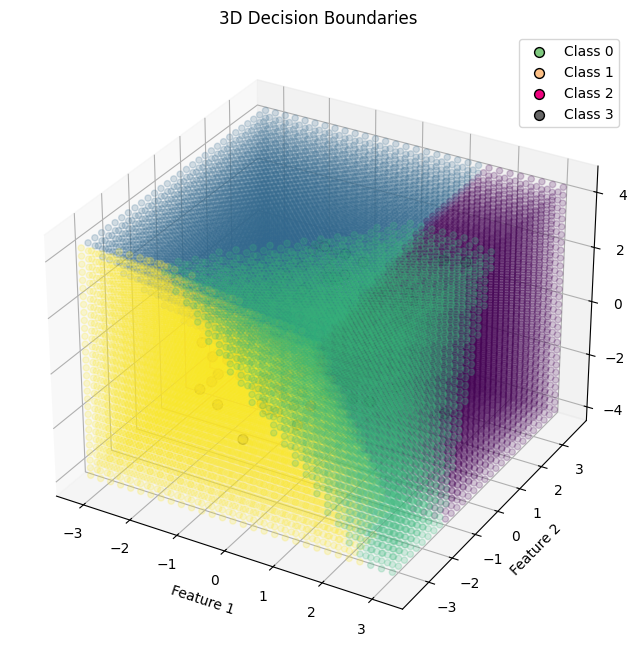

C:\Users\mamdaliof\AppData\Local\Temp\ipykernel_20868\550828615.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('Accent')  # Get a colormap


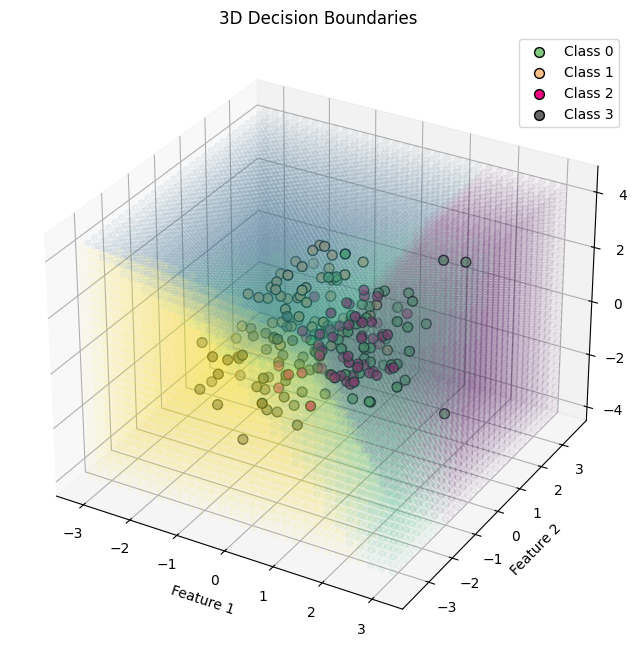

In [21]:
"""
Visualize the decision boundaries of trained models.

This section generates plots to visualize the decision areas created by the machine learning models trained in previous sections.
These visualizations help in understanding how the models are distinguishing between different classes based on the dataset features.

The decision boundaries are plotted using the feature space of the dataset, showing where the model transitions from predicting one class to another.

The function or code block responsible for generating these plots should take the necessary data as inputs, including model instances and feature sets.
The output will be a plot for each model showing the regions of feature space associated with each predicted class.

Note: The specifics of the plotting code depend on the dataset's dimensionality and the models' complexity.
The following blocks of code was written with the assistance of ChatGPT
"""

def plot_3d_decision_boundaries(X, y, model, alpha=0.2):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    z_min, z_max = X[:, 2].min() - 1, X[:, 2].max() + 1

    # Create a grid of points
    xx, yy, zz = np.meshgrid(np.linspace(x_min, x_max, 30),
                             np.linspace(y_min, y_max, 30),
                             np.linspace(z_min, z_max, 30))

    mesh_points = np.c_[xx.ravel(), yy.ravel(), zz.ravel()]
    Z = model.predict(mesh_points)

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot the decision boundaries with low opacity
    ax.scatter(mesh_points[:, 0], mesh_points[:, 1],
               mesh_points[:, 2], c=Z, alpha=alpha)

    # Then plot the actual data points on top with high visibility
    color_map = plt.cm.get_cmap('Accent')  # Get a colormap
    distinct_colors = [color_map(i)
                       for i in np.linspace(0, 1, len(np.unique(y)))]
    for i, class_label in enumerate(np.unique(y)):
        xi = X[y == class_label, 0]
        yi = X[y == class_label, 1]
        zi = X[y == class_label, 2]
        ax.scatter(
            xi, yi, zi, color=distinct_colors[i], edgecolor='k', s=50, label=f'Class {class_label}')

    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    plt.title("3D Decision Boundaries")
    plt.legend()
    plt.show()


plot_3d_decision_boundaries(X_test, Y_test, SGD6_Q1["log_loss"], alpha=0.2)
plot_3d_decision_boundaries(X_test, Y_test, SGD6_Q1["log_loss"], alpha=0.05)

In [22]:
def plot_3d_decision_boundaries_interactive(X, y, model):
    # Predict the classes for the actual data points to find misclassified points
    y_pred = model.predict(X)
    misclassified = y_pred != y

    # Create a grid of points to predict the classes for boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    z_min, z_max = X[:, 2].min() - 1, X[:, 2].max() + 1

    xx, yy, zz = np.meshgrid(np.linspace(x_min, x_max, 30),
                             np.linspace(y_min, y_max, 30),
                             np.linspace(z_min, z_max, 30))

    mesh_points = np.c_[xx.ravel(), yy.ravel(), zz.ravel()]
    Z = model.predict(mesh_points)

    # Plot the decision boundary points with low opacity
    boundary_trace = go.Scatter3d(
        x=mesh_points[:, 0],
        y=mesh_points[:, 1],
        z=mesh_points[:, 2],
        mode='markers',
        marker=dict(
            size=3,
            color=Z,  # coloring by predicted class
            opacity=0.2
        )
    )

    # Plot the actual data points
    data_trace = go.Scatter3d(
        x=X[:, 0],
        y=X[:, 1],
        z=X[:, 2],
        mode='markers',
        marker=dict(
            size=5,
            color=y,  # coloring by actual class
            line=dict(
                color='Black',
                width=2
            )
        )
    )

    # Plot misclassified points with higher visibility
    misclassified_trace = go.Scatter3d(
        x=X[misclassified, 0],
        y=X[misclassified, 1],
        z=X[misclassified, 2],
        mode='markers',
        marker=dict(
            size=8,
            color='Red',  # red color for misclassified points
            line=dict(
                color='Black',
                width=2
            )
        ),
        name='Misclassified'
    )

    fig = go.Figure(data=[boundary_trace, data_trace, misclassified_trace])
    fig.update_layout(margin=dict(l=0, r=0, b=0, t=0),
                      title="3D Decision Boundaries with Misclassified Points")
    fig.show()


plot_3d_decision_boundaries_interactive(X_test, Y_test, SGD6_Q1["log_loss"])

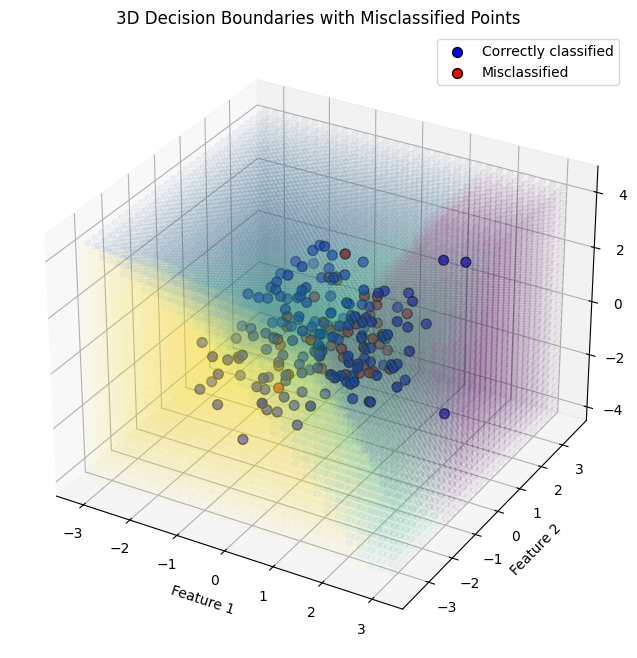

In [23]:
def plot_decision_boundaries(X, y, model):
    # Predicting using the model
    y_pred = model.predict(X)
    # Find where predictions and true labels don't match
    misclassified_mask = y_pred != y

    # Create a mesh grid for plotting decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    z_min, z_max = X[:, 2].min() - 1, X[:, 2].max() + 1

    xx, yy, zz = np.meshgrid(np.linspace(x_min, x_max, 30),
                             np.linspace(y_min, y_max, 30),
                             np.linspace(z_min, z_max, 30))

    grid_points = np.c_[xx.ravel(), yy.ravel(), zz.ravel()]
    Z = model.predict(grid_points)
    Z = Z.reshape(xx.shape)

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot the decision boundaries
    ax.scatter(grid_points[:, 0], grid_points[:, 1],
               grid_points[:, 2], c=Z, alpha=0.05)

    # Plot correctly classified points
    ax.scatter(X[~misclassified_mask, 0], X[~misclassified_mask, 1], X[~misclassified_mask, 2],
               color='blue', edgecolor='k', s=50, label='Correctly classified')

    # Plot misclassified points
    ax.scatter(X[misclassified_mask, 0], X[misclassified_mask, 1], X[misclassified_mask, 2],
               color='red', edgecolor='k', s=50, label='Misclassified')

    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    plt.title("3D Decision Boundaries with Misclassified Points")
    plt.legend()
    plt.show()


plot_decision_boundaries(X_test, Y_test, SGD6_Q1["log_loss"])